## Module importing

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## Data loading

In [4]:
data = pd.read_csv('data/WiscLottery.csv')
data.shape

(50, 10)

In [5]:
data.head()

,ZIP,PERPERHH,MEDSCHYR,MEDHVL,PRCRENT,PRC55P,HHMEDAGE,MEDINC,SALES,POP
0,53003,3.0,12.6,71.3,21,38,48,54.2,1285.4000,435
1,53033,3.2,12.9,98.0,6,28,46,70.7,3571.4500,4823
2,53038,2.8,12.4,58.7,25,35,45,43.6,2407.0375,2469
3,53059,3.1,12.5,65.7,24,29,45,51.9,1223.8250,2051
4,53072,2.6,13.1,96.7,32,27,42,63.1,15046.4000,13337


In [6]:
data = data.drop(['ZIP'], axis=1)

## EDA

**Давайте подивимось детальніше на наші дані**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERPERHH  50 non-null     float64
 1   MEDSCHYR  50 non-null     float64
 2   MEDHVL    50 non-null     float64
 3   PRCRENT   50 non-null     int64  
 4   PRC55P    50 non-null     int64  
 5   HHMEDAGE  50 non-null     int64  
 6   MEDINC    50 non-null     float64
 7   SALES     50 non-null     float64
 8   POP       50 non-null     int64  
dtypes: float64(5), int64(4)
memory usage: 3.6 KB


**як бачимо, вони не місять пропущених значень. Тепер давайте порахуємо описові статичтики для нашого датасету.**

In [8]:
data.describe()

,PERPERHH,MEDSCHYR,MEDHVL,PRCRENT,PRC55P,HHMEDAGE,MEDINC,SALES,POP
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2.706000,12.696000,57.092000,24.680000,39.700000,48.760000,45.122000,6494.829000,9311.040000
std,0.209382,0.551421,18.373115,9.342551,7.511216,4.143153,9.783562,8103.012504,11098.156951
min,2.200000,12.200000,34.500000,6.000000,25.000000,41.000000,27.900000,189.000000,280.000000
25%,2.600000,12.500000,43.775000,19.250000,35.000000,46.000000,38.175000,821.312500,1964.500000
50%,2.700000,12.600000,53.900000,24.000000,40.000000,48.000000,43.100000,2426.406250,4405.500000
75%,2.800000,12.775000,66.475000,27.000000,44.000000,51.000000,53.625000,10016.537500,15446.000000
max,3.200000,15.900000,120.000000,62.000000,56.000000,59.000000,70.700000,33181.400000,39098.000000


+ медіана та середнє значення для полів POP та SALES помітно відрізняється

**Тепер давайте подивимось чи є в наших даних якісь залежності.**

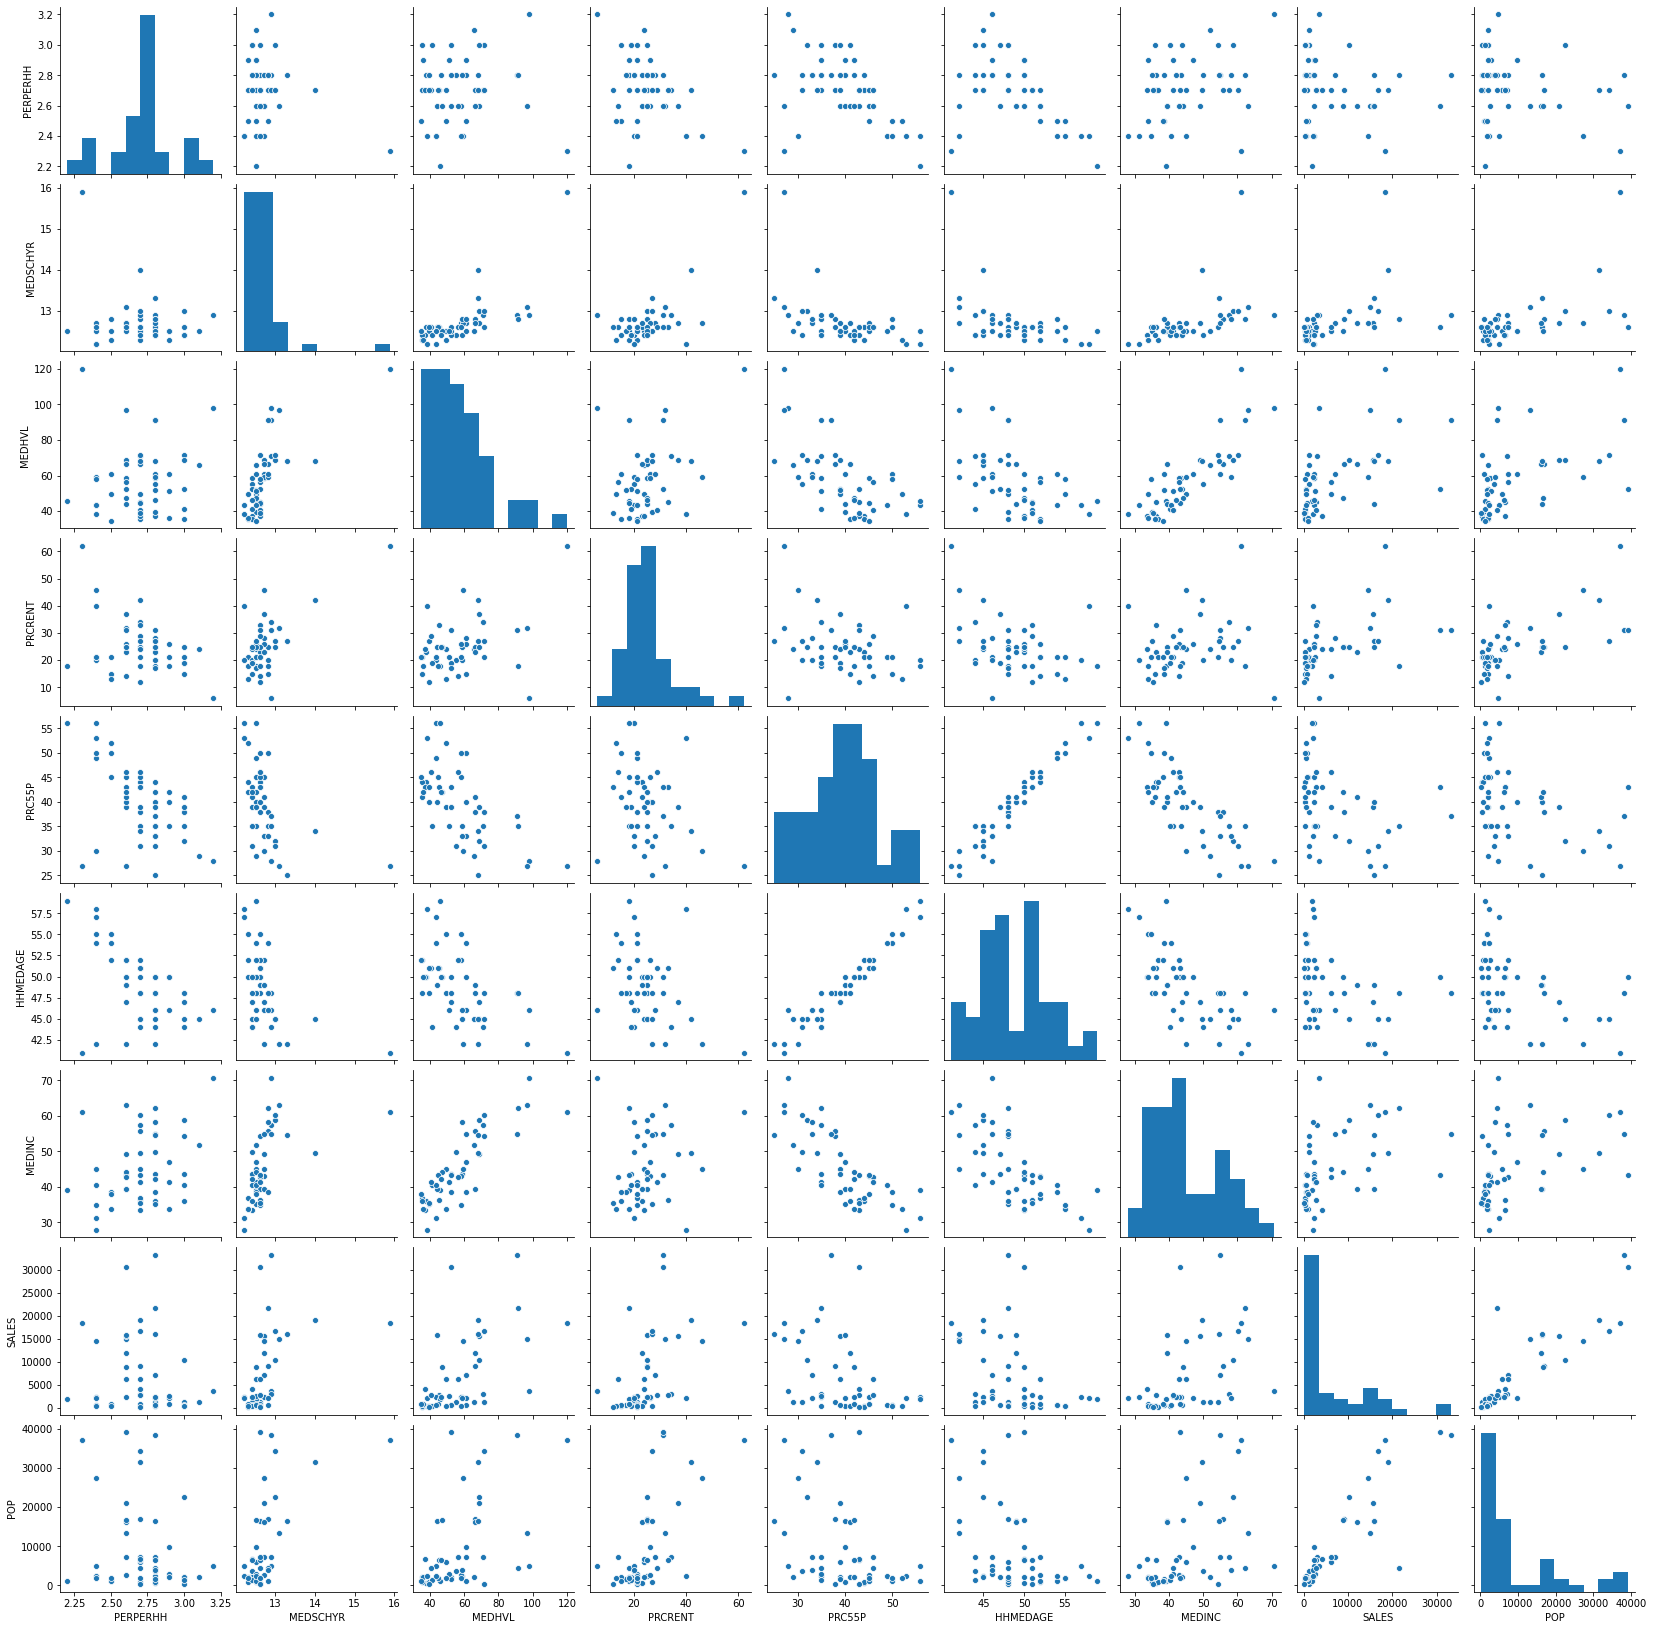

In [9]:
sns.pairplot(data)

**Бачимо, що:**
+ деякі фічі сильно корелюють один з одним
+ дані містять викиди (outliers)

**Побудуємо матрицю кореляцій Пірсона**

<AxesSubplot:>

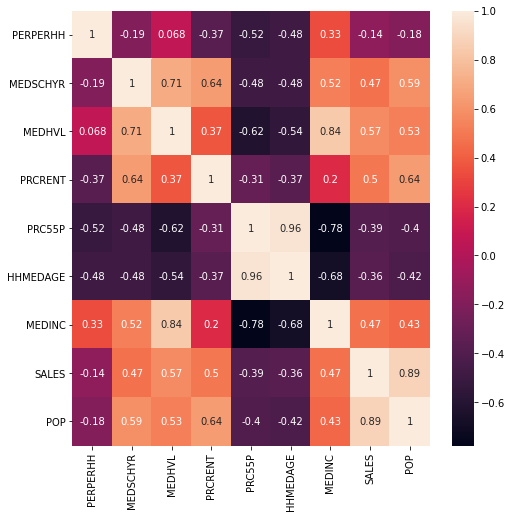

In [10]:
f, ax = plt.subplots(1,1, figsize=(8,8))
sns.heatmap(data.corr(), annot=True, ax=ax)

**Побудуємо матрицю кореляцій Спірмена**

<AxesSubplot:>

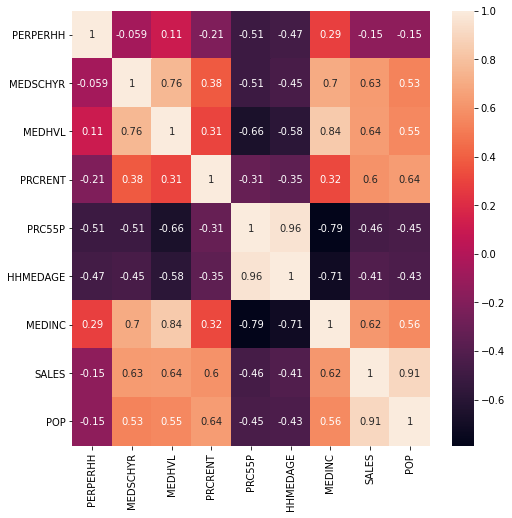

In [11]:
f, ax = plt.subplots(1,1, figsize=(8,8))
sns.heatmap(data.corr(method='spearman'), annot=True, ax=ax)

## I PART

**Побудувати ОНК, зробити висновки, щодо якостi моделi та ОНК.**

+ ОНК
+ наявнiсть кореляцiй мiж регресорами
+ якiсть ОНК (її дисперсiя, якiсть прогнозування, наведена дiаграма залишкiв, коефiцiєнт детермiнацiї та результати тесту Фiшера).

## Data preparation

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = data.drop(['SALES'], axis=1)
y = data['SALES']

**поділимо вибірку на train та тест у пропорцiх 80% та 20%**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

**перевірка:**

In [15]:
len(y_train) / (len(y_train) + len(y_test))

0.8

## Define functions

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

## Model building

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
from yellowbrick.regressor import ResidualsPlot

/home/kryvokhyzha/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [20]:
from sklearn.metrics import explained_variance_score, r2_score
from scipy import stats

**Побудуємо модель лінійної регресії**

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train, y_train)

LinearRegression()

**Перевіримо якісь даної моделі, використовуючи метрику RMSE**

In [23]:
predictions_test = lr.predict(X_test)
predictions_train = lr.predict(X_train)

In [24]:
print(f'(train data) RMSE = {rmse(y_train, predictions_train)}')
print(f'(test data) RMSE = {rmse(y_test, predictions_test)}')

(train data) RMSE = 3463.334908725755
(test data) RMSE = 2595.7395702224503


**Перевіримо гіпотезу по рівість дисперсій (тест Фішера)**

H_0: σ_12 = σ_22

H_1: σ_12 ≠ σ_22

In [25]:
print('test var = %s; train var = %s' % (np.var(y_test, ddof=1), np.var(predictions_test, ddof=1)))

test var = 22277384.422515623; train var = 45120365.86497085


In [26]:
#define F-test function
def f_test(y_true, y_pred):
    f = np.var(y_true, ddof=1)/np.var(y_pred, ddof=1) #calculate F test statistic 
    dfn = y_true.size-1 #define degrees of freedom numerator 
    dfd = y_pred.size-1 #define degrees of freedom denominator 
    p = 1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

In [27]:
f_stat, p_val = f_test(y_test, predictions_test)

if p_val < 0.05:
    print('(test) Reject the null hypothesis')
else:
    print('(test) Cann`t reject the null hypothesis')

(test) Cann`t reject the null hypothesis


In [28]:
f_stat, p_val = f_test(y_train, predictions_train)

if p_val < 0.05:
    print('(train) Reject the null hypothesis')
else:
    print('(train) Cann`t reject the null hypothesis')

(train) Cann`t reject the null hypothesis


**Давайте поглянемо на значення коефіцієнта детермінації**

_It represents the proportion of variance (of y) that has been explained by the independent variables in the model_

In [29]:
R_2_train = r2_score(y_train, predictions_train)
R_2_test = r2_score(y_test, predictions_test)

In [30]:
print(f'(train data) R^2 = {R_2_train}')
print(f'(test data) R^2 = {R_2_test}')

(train data) R^2 = 0.82991571397341
(test data) R^2 = 0.6639410030954626


**Давайте полянемо на діаграму залишків**

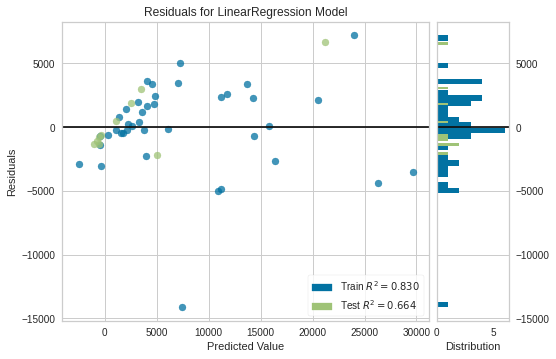

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [31]:
visualizer = ResidualsPlot(lr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

**Давайте поглянемо на значенн коефіцієнтів моделі**

In [32]:
lr.intercept_, lr.coef_

(82837.52600236895,
 array([-5.98652869e+03, -5.11214484e+03,  1.85354517e+02, -6.30638747e+01,
        -2.63788703e+02,  1.43325858e+02, -1.55412663e+02,  6.79398301e-01]))

**Бачимо, що значення деяких коефіцієнтів є досить великими. Це може бути пов'язано з тим, що деякі регресори корелюють між собою. Або потрібно відмасштабувати змінні.**

## II PART

**Спробувати покращити оцiнку, шляхом використання гребеневої регресiї.**

+ Пiдбiр параметра λ, покращення (чи вiдсутнiсть покращення) якостi прогнозу, зменшення дисперсiї.

## Data preparation

**Проведемо масштабування змінних**

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X = scaler.fit_transform(data.drop(['SALES'], axis=1))
y = data['SALES'].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## Model building

In [37]:
from sklearn.linear_model import Ridge

**Побудуємо дві моделі та порівняємо результат**

In [38]:
lr = LinearRegression()
ridge_r = Ridge()

In [39]:
lr.fit(X_train, y_train)
ridge_r.fit(X_train, y_train)

Ridge()

In [40]:
predict_lr_train = lr.predict(X_train)
predict_ridge_train = ridge_r.predict(X_train)

predict_lr_test = lr.predict(X_test)
predict_ridge_test = ridge_r.predict(X_test)

In [41]:
print(f'(train data|LR) RMSE = {rmse(y_train, predict_lr_train)}')
print(f'(test data|LR) RMSE = {rmse(y_test, predict_lr_test)}')

(train data|LR) RMSE = 3463.3349087257548
(test data|LR) RMSE = 2595.739570220084


In [42]:
print(f'(train data|Ridge) RMSE = {rmse(y_train, predict_ridge_train)}')
print(f'(test data|Ridge) RMSE = {rmse(y_test, predict_ridge_test)}')

(train data|Ridge) RMSE = 3487.418441559013
(test data|Ridge) RMSE = 2237.068623431438


**Бачимо, що на тестовому датасеті значення помилки стало меншим. Тепер давайте поглянемо на значення коефіцієнтів:**

In [43]:
ridge_r.intercept_, ridge_r.coef_

(6598.192511067885,
 array([-1035.61990665, -2392.39756176,  2860.20963086,  -421.26747568,
        -1073.02725192,   139.92350528,  -835.22103638,  7123.88082824]))

In [44]:
lr.intercept_, lr.coef_

(6589.5640728048,
 array([-1240.87324962, -2790.61306188,  3371.31250672,  -583.25595382,
        -1961.4601451 ,   587.85271413, -1505.20767032,  7464.2874652 ]))

**В значеннях коефіцієнтів не видно очевидних аномалій**

## Grid search

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
parameters = {'alpha': np.linspace(1, 10, 100)}

# define the model/ estimator
ridge_r = Ridge()

# define the grid search
Ridge_reg = GridSearchCV(ridge_r, parameters, cv=3)

#fit the grid search
Ridge_reg.fit(X_train, y_train)

# best model
best_model_ridge = Ridge_reg.best_estimator_
best_model_ridge.fit(X_train, y_train)

Ridge()

**Поглянемо на найкраще знайдене значення _alpha_**

In [47]:
Ridge_reg.best_params_

{'alpha': 1.0}

**При побудові Ridge regression з дефолтними параметрами alpha=1.0. Тому очікую, що значення похибки залишиться таким же**

In [48]:
predict_ridge_test = best_model_ridge.predict(X_test)
predict_ridge_train = best_model_ridge.predict(X_train)

In [49]:
print(f'(train data|Ridge) RMSE = {rmse(y_train, predict_ridge_train)}')
print(f'(test data|Ridge) RMSE = {rmse(y_test, predict_ridge_test)}')

(train data|Ridge) RMSE = 3487.418441559013
(test data|Ridge) RMSE = 2237.068623431438


**Дійсно, результат не покращився**

## III PART

**Спробувати зменшити розмiрнiсть простору регресорiв використовуючи метод головних компонент.**

+ Пiдбiр оптимальної кiлькостi головних компонент, порiвняння результатiв зi звичайним МНК.

## Data preparation

In [50]:
scaler = StandardScaler()

In [51]:
X = scaler.fit_transform(data.drop(['SALES'], axis=1))
y = data['SALES'].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## Data decomposition

In [53]:
from sklearn.decomposition import PCA

**Виконаємо підбір оптимального значення кількості головних компонент**

In [54]:
n_components_history = {}
for n_components in range(1, X_train.shape[1]):
    pca = PCA(n_components=n_components, random_state=42)
    
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    ridge_r = Ridge(alpha=1.0)
    ridge_r.fit(X_train_pca, y_train)
    predict_ridge = ridge_r.predict(X_test_pca)
    
    n_components_history[n_components] = np.sqrt(mean_squared_error(y_test, predict_ridge))
n_components_history

{1: 3655.7476503624666,
 2: 1888.6822413680948,
 3: 2144.8209684565945,
 4: 1073.9450693699882,
 5: 1294.6506963678141,
 6: 1542.5512624835983,
 7: 2245.7391658752435}

## Model building

In [55]:
pca = PCA(n_components=4, random_state=42)

In [56]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [57]:
ridge_r = Ridge(alpha=1.0)

In [58]:
ridge_r.fit(X_train_pca, y_train)

predict_ridge_test = ridge_r.predict(X_test_pca)
predict_ridge_train = ridge_r.predict(X_train_pca)

In [59]:
print(f'(train data|Ridge + PCA) RMSE = {rmse(y_train, predict_ridge_train)}')
print(f'(test data|Ridge + PCA) RMSE = {rmse(y_test, predict_ridge_test)}')

(train data|Ridge + PCA) RMSE = 3783.761651969401
(test data|Ridge + PCA) RMSE = 1073.9450693699882


**Результат роботи моделі значно покращився, в порівнянні з попередніми**

## IV PART

**Здiйснити процедуру оптимального вiдбору регресорiв**

+ Метод що використовувася для оптимального вiдбору, та досягнутi результати.

## Data preparation

In [60]:
scaler = StandardScaler()

In [61]:
X = scaler.fit_transform(data.drop(['SALES'], axis=1))
y = data['SALES'].values

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## Feature selection

In [63]:
from sklearn.feature_selection import RFE

The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

In [64]:
#no of features
nof_list = np.arange(1, X_train.shape[1])                  
high_score = 0

#Variable to store the optimum features
nof = 0
score_list = []
for n in range(len(nof_list)):
    model = Ridge(alpha=1.0)
    rfe = RFE(model, n_features_to_select=nof_list[n])
    
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    
    model.fit(X_train_rfe, y_train)
    
    score = model.score(X_test_rfe, y_test)
    score_list.append(score)
    
    if(score > high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 2
Score with 2 features: 0.920110


In [65]:
ridge_r = Ridge(alpha=1.0)

In [67]:
rfe = RFE(ridge_r , n_features_to_select=2)

In [68]:
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

In [69]:
ridge_r.fit(X_train_rfe, y_train)

Ridge()

In [70]:
predict_ridge_test = ridge_r.predict(X_test_rfe)
predict_ridge_train = ridge_r.predict(X_train_rfe)

In [71]:
print(f'(train data|Ridge + RFE) RMSE = {rmse(y_train, predict_ridge_train)}')
print(f'(test data|Ridge + RFE) RMSE = {rmse(y_test, predict_ridge_test)}')

(train data|Ridge + RFE) RMSE = 3957.0695493105673
(test data|Ridge + RFE) RMSE = 1265.607550852477


**Бачимо, що отримай результат є кращим, ніж просто використання гребневої регресії. Але він все ще гірше, ніж Ridge + PCA**